In [ ]:
# aggregate data: make it predictable by summing columns with same name from the 3 sources.
# make it predictable: take the logarithm?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
count_ig_csv = 'emerging_risks_doc_count_instagram.csv'
count_tw_csv = 'emerging_risks_doc_count_twitter.csv'
engagement_fb_csv = 'emerging_risks_local_engagement_facebook.csv'
engagement_ig_csv = 'emerging_risks_local_engagement_instagram.csv'
engagement_tw_csv = 'emerging_risks_local_engagement_twitter.csv'

files = [count_ig_csv, count_tw_csv, engagement_fb_csv, engagement_ig_csv, engagement_tw_csv]

dfs = {'count_ig_csv': pd.read_csv(count_ig_csv), 
       'count_tw_csv': pd.read_csv(count_tw_csv), 
       'engagement_fb_csv': pd.read_csv(engagement_fb_csv), 
       'engagement_ig_csv': pd.read_csv(engagement_ig_csv), 
       'engagement_tw_csv': pd.read_csv(engagement_tw_csv)}

In [4]:
# aggregate Farmer ONLY FROM engagement. Engagement is likes + shares.
farmer_tot = dfs['engagement_ig_csv'].Farmer
farmer_tot += dfs['engagement_fb_csv'].Farmer
farmer_tot += dfs['engagement_tw_csv'].Farmer

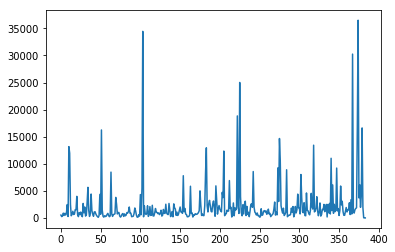

In [5]:
plt.plot(farmer_tot)

In [6]:
log_farmer_tot = np.log(farmer_tot[:-3])   # at least [-1] because last value is 0 and log(0) is impossible
# since twitter has no engagement for the last 3 days (possible Error???) and twitter is the biggest component of engagement
# across the dataset, farmer_tot[-3:-1] are outliers.

In [25]:
log_farmer_tot_moving_avg = log_farmer_tot.rolling(7).mean() # WATCH OUT! FIRST 6 VALUES ARE np.Nan

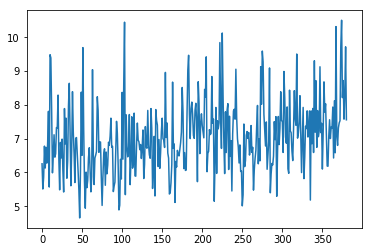

In [26]:
plt.plot(log_farmer_tot)

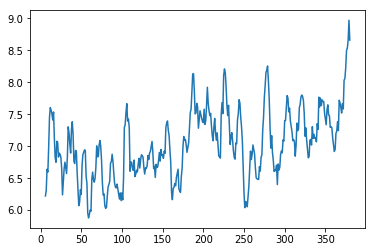

In [29]:
plt.plot(log_farmer_tot_moving_avg)

In [32]:
log_farmer_tot_moving_avg.autocorr()

0.9311514290076162

(array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10]),
 array([0.96416465, 0.96729404, 0.97039907, 0.97375748, 0.97752715,
        0.9813993 , 0.98528713, 0.98903193, 0.9928118 , 0.99656318,
        1.        , 0.99656318, 0.9928118 , 0.98903193, 0.98528713,
        0.9813993 , 0.97752715, 0.97375748, 0.97039907, 0.96729404,
        0.96416465]),
 <matplotlib.lines.Line2D at 0x19a4ffd0>)

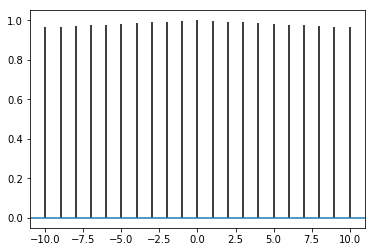

In [10]:
plt.acorr(log_farmer_tot.rolling(7).mean()[6:])

In [11]:
log_farmer_tot.autocorr()

0.27240478580087635

(array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10]),
 array([0.94969663, 0.95353007, 0.95709832, 0.96066364, 0.96355872,
        0.96581942, 0.96943204, 0.97227987, 0.97598743, 0.98182617,
        1.        , 0.98182617, 0.97598743, 0.97227987, 0.96943204,
        0.96581942, 0.96355872, 0.96066364, 0.95709832, 0.95353007,
        0.94969663]),
 <matplotlib.lines.Line2D at 0x19b5dfd0>)

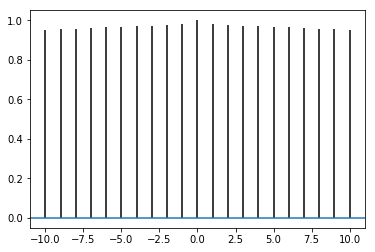

In [12]:
plt.acorr(log_farmer_tot)

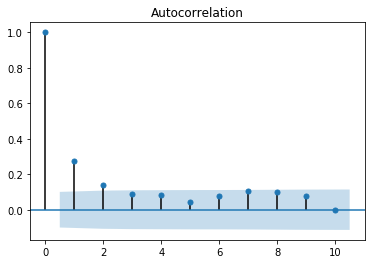

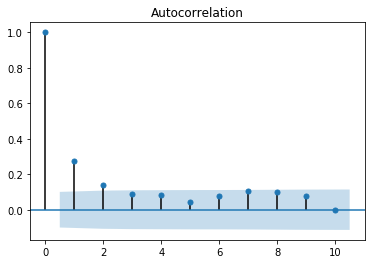

In [13]:
import statsmodels.api as sm

sm.graphics.tsa.plot_acf(log_farmer_tot, lags=10)

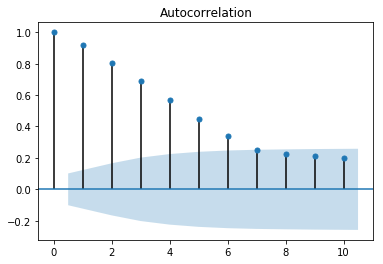

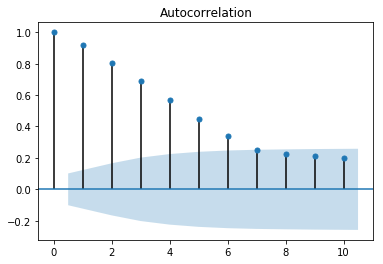

In [14]:
import statsmodels.api as sm

sm.graphics.tsa.plot_acf(log_farmer_tot.rolling(7).mean()[6:], lags=10)

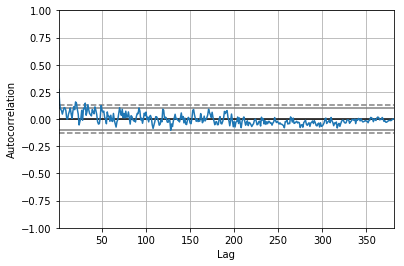

In [19]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(log_farmer_tot)

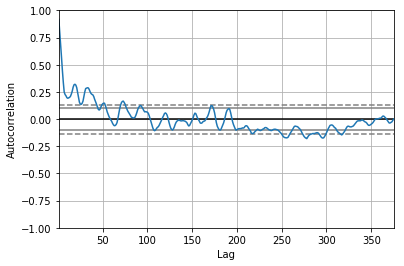

In [20]:
autocorrelation_plot(log_farmer_tot.rolling(7).mean()[6:])

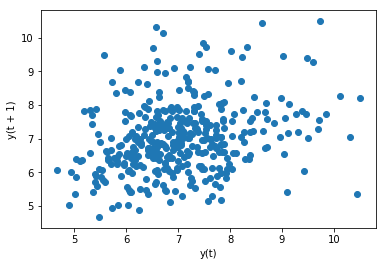

In [35]:
from pandas.plotting import lag_plot
lag_plot(log_farmer_tot)

In [45]:
df_autocorrelation_log_farmer_tot = pd.DataFrame()

df_autocorrelation_log_farmer_tot['t'] = log_farmer_tot